# **Exploratory Data Analysis**

## Performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [7]:

#! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
#! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
#! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
#! conda install -c rdkit rdkit -y
#import sys
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

## **Load bioactivity data**

In [8]:
import pandas as pd

In [9]:
dataset_url = 'https://raw.githubusercontent.com/Rodhanp/Drug-Discovery/main/1_Data%20Collection%20and%20Pre-processing/output/DAT/DAT-bioactivity_preprocessed_data_04082021.csv'
df = pd.read_csv(dataset_url)
df
#! wget = https://raw.githubusercontent.com/Rodhanp/Drug-Discovery/main/Data%20Collection%20and%20Pre-processing/data/Coronavirus_bioactivity_data_preprocessed_02082021.csv
#df = pd.read_csv('Coronavirus_bioactivity_data_preprocessed_02082021.csv')

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL1790051,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccccc1)N2C.Cl,373.0,active
1,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,405.0,active
2,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...,470.0,active
3,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...,717.0,active
4,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...,1161.0,intermediate
...,...,...,...,...
1745,CHEMBL91,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,1701.0,inactive
1746,CHEMBL1373,NC(=O)C[S+]([O-])C(c1ccccc1)c1ccccc1,1832.0,intermediate
1747,CHEMBL19215,CN1C[C@H](CNC(=O)OCc2ccccc2)C[C@@H]2c3cccc4c3c...,63.0,inactive
1748,CHEMBL1200633,CC[C@H](C)[C@H]1O[C@]2(CC[C@@H]1C)C[C@@H]1C[C@...,4455.2,intermediate


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [10]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [11]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [12]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [13]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,295.810,2.84770,0.0,3.0
1,303.358,1.86770,0.0,5.0
2,626.794,5.18954,1.0,8.0
3,626.794,5.18954,1.0,8.0
4,626.794,5.18954,1.0,8.0
...,...,...,...,...
1745,416.135,6.45480,0.0,3.0
1746,273.357,2.01000,1.0,2.0
1747,403.526,4.06470,1.0,4.0
1748,1736.185,10.81270,6.0,28.0


In [14]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL1790051,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccccc1)N2C.Cl,373.0,active
1,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,405.0,active
2,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...,470.0,active
3,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...,717.0,active
4,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...,1161.0,intermediate
...,...,...,...,...
1745,CHEMBL91,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,1701.0,inactive
1746,CHEMBL1373,NC(=O)C[S+]([O-])C(c1ccccc1)c1ccccc1,1832.0,intermediate
1747,CHEMBL19215,CN1C[C@H](CNC(=O)OCc2ccccc2)C[C@@H]2c3cccc4c3c...,63.0,inactive
1748,CHEMBL1200633,CC[C@H](C)[C@H]1O[C@]2(CC[C@@H]1C)C[C@@H]1C[C@...,4455.2,intermediate


Now, let's combine the 2 DataFrame

In [15]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [16]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1790051,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccccc1)N2C.Cl,373.0,active,295.810,2.84770,0.0,3.0
1,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,405.0,active,303.358,1.86770,0.0,5.0
2,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...,470.0,active,626.794,5.18954,1.0,8.0
3,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...,717.0,active,626.794,5.18954,1.0,8.0
4,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...,1161.0,intermediate,626.794,5.18954,1.0,8.0
...,...,...,...,...,...,...,...,...
1745,CHEMBL91,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,1701.0,inactive,416.135,6.45480,0.0,3.0
1746,CHEMBL1373,NC(=O)C[S+]([O-])C(c1ccccc1)c1ccccc1,1832.0,intermediate,273.357,2.01000,1.0,2.0
1747,CHEMBL19215,CN1C[C@H](CNC(=O)OCc2ccccc2)C[C@@H]2c3cccc4c3c...,63.0,inactive,403.526,4.06470,1.0,4.0
1748,CHEMBL1200633,CC[C@H](C)[C@H]1O[C@]2(CC[C@@H]1C)C[C@@H]1C[C@...,4455.2,intermediate,1736.185,10.81270,6.0,28.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [17]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [18]:
df_combined.standard_value.describe()

count      1750.000000
mean       4969.233174
std       21617.660216
min           0.002000
25%          62.225000
50%         520.650000
75%        4566.750000
max      744000.000000
Name: standard_value, dtype: float64

In [19]:
-np.log10( (10**-9)* 100000000 )

1.0

In [20]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [21]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [22]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL1790051,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccccc1)N2C.Cl,active,295.810,2.84770,0.0,3.0,373.0
1,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,active,303.358,1.86770,0.0,5.0,405.0
2,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...,active,626.794,5.18954,1.0,8.0,470.0
3,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...,active,626.794,5.18954,1.0,8.0,717.0
4,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...,intermediate,626.794,5.18954,1.0,8.0,1161.0
...,...,...,...,...,...,...,...,...
1745,CHEMBL91,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,inactive,416.135,6.45480,0.0,3.0,1701.0
1746,CHEMBL1373,NC(=O)C[S+]([O-])C(c1ccccc1)c1ccccc1,intermediate,273.357,2.01000,1.0,2.0,1832.0
1747,CHEMBL19215,CN1C[C@H](CNC(=O)OCc2ccccc2)C[C@@H]2c3cccc4c3c...,inactive,403.526,4.06470,1.0,4.0,63.0
1748,CHEMBL1200633,CC[C@H](C)[C@H]1O[C@]2(CC[C@@H]1C)C[C@@H]1C[C@...,intermediate,1736.185,10.81270,6.0,28.0,4455.2


In [23]:
df_norm.standard_value_norm.describe()

count      1750.000000
mean       4969.233174
std       21617.660216
min           0.002000
25%          62.225000
50%         520.650000
75%        4566.750000
max      744000.000000
Name: standard_value_norm, dtype: float64

In [24]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1790051,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccccc1)N2C.Cl,active,295.810,2.84770,0.0,3.0,6.428291
1,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,active,303.358,1.86770,0.0,5.0,6.392545
2,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...,active,626.794,5.18954,1.0,8.0,6.327902
3,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...,active,626.794,5.18954,1.0,8.0,6.144481
4,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...,intermediate,626.794,5.18954,1.0,8.0,5.935168
...,...,...,...,...,...,...,...,...
1745,CHEMBL91,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,inactive,416.135,6.45480,0.0,3.0,5.769296
1746,CHEMBL1373,NC(=O)C[S+]([O-])C(c1ccccc1)c1ccccc1,intermediate,273.357,2.01000,1.0,2.0,5.737075
1747,CHEMBL19215,CN1C[C@H](CNC(=O)OCc2ccccc2)C[C@@H]2c3cccc4c3c...,inactive,403.526,4.06470,1.0,4.0,7.200659
1748,CHEMBL1200633,CC[C@H](C)[C@H]1O[C@]2(CC[C@@H]1C)C[C@@H]1C[C@...,intermediate,1736.185,10.81270,6.0,28.0,5.351133


In [25]:
df_final.pIC50.describe()

count    1750.000000
mean        6.379291
std         1.229131
min         3.128427
25%         5.340408
50%         6.283454
75%         7.206044
max        11.698970
Name: pIC50, dtype: float64

In [26]:
df_final.to_csv('DAT_bioactivity_data_3class_pIC50_04082021.csv')

### **Removing the 'intermediate' bioactivity class**
For quick analysis, we will be removing the ``intermediate`` class from our data set.

In [27]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1790051,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccccc1)N2C.Cl,active,295.810,2.84770,0.0,3.0,6.428291
1,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,active,303.358,1.86770,0.0,5.0,6.392545
2,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...,active,626.794,5.18954,1.0,8.0,6.327902
3,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...,active,626.794,5.18954,1.0,8.0,6.144481
5,CHEMBL435341,C/C=C\c1ccc([C@H]2CC3CCC([C@H]2C(=O)OC)N3C)cc1,active,299.414,3.45900,0.0,3.0,7.494850
...,...,...,...,...,...,...,...,...
1742,CHEMBL728,CN1CCN(CCCN2c3ccccc3Sc3ccc(Cl)cc32)CC1,active,373.953,4.58020,0.0,4.0,5.760701
1743,CHEMBL21731,CNCCCC12CCC(c3ccccc31)c1ccccc12,inactive,277.411,4.21140,1.0,1.0,5.536107
1745,CHEMBL91,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,inactive,416.135,6.45480,0.0,3.0,5.769296
1747,CHEMBL19215,CN1C[C@H](CNC(=O)OCc2ccccc2)C[C@@H]2c3cccc4c3c...,inactive,403.526,4.06470,1.0,4.0,7.200659


In [28]:
df_2class.to_csv('DAT_bioactivity_data_2class_pIC50_04082021.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [29]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

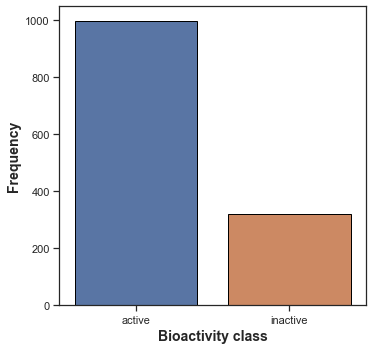

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

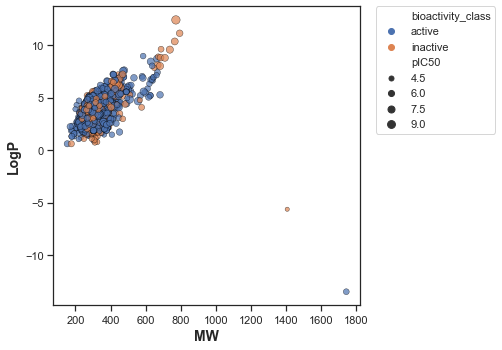

In [31]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

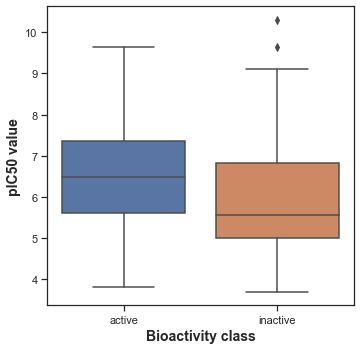

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [33]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [34]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,112174.0,2.888834e-16,0.05,Different distribution (reject H0)


#### **MW**

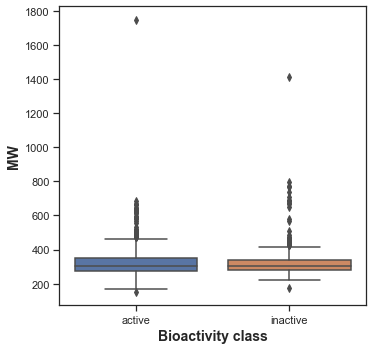

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [36]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,153692.0,0.137263,0.05,Same distribution (fail to reject H0)


#### **LogP**

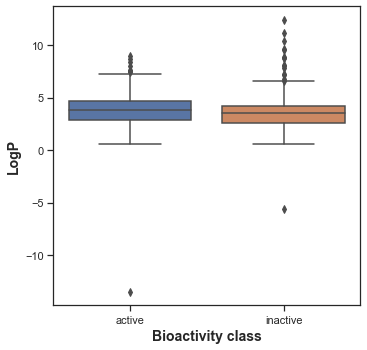

In [37]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [38]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,140684.5,0.000512,0.05,Different distribution (reject H0)


#### **NumHDonors**

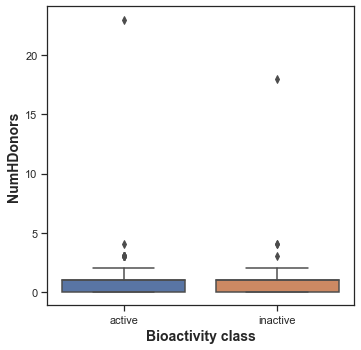

In [39]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [40]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,150852.5,0.040192,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

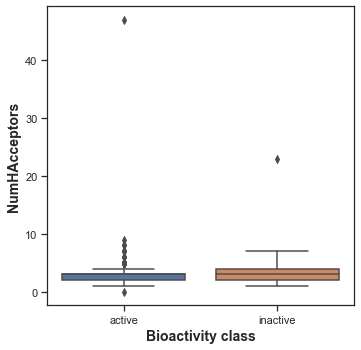

In [41]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [42]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,138624.0,0.000081,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only MW exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [43]:
! zip -r Output-DAT-Exploratory-Data-Analysis-04082021.zip . -i *.csv *.pdf

  adding: DAT_bioactivity_data_2class_pIC50_04082021.csv (196 bytes security) (deflated 78%)
  adding: DAT_bioactivity_data_3class_pIC50_04082021.csv (196 bytes security) (deflated 79%)
  adding: mannwhitneyu_LogP.csv (196 bytes security) (deflated 9%)
  adding: mannwhitneyu_MW.csv (196 bytes security) (deflated 6%)
  adding: mannwhitneyu_NumHAcceptors.csv (196 bytes security) (deflated 10%)
  adding: mannwhitneyu_NumHDonors.csv (196 bytes security) (deflated 9%)
  adding: mannwhitneyu_pIC50.csv (196 bytes security) (deflated 9%)
  adding: plot_bioactivity_class.pdf (196 bytes security) (deflated 40%)
  adding: plot_ic50.pdf (196 bytes security) (deflated 38%)
  adding: plot_LogP.pdf (196 bytes security) (deflated 42%)
  adding: plot_MW.pdf (196 bytes security) (deflated 39%)
  adding: plot_MW_vs_LogP.pdf (196 bytes security) (deflated 3%)
  adding: plot_NumHAcceptors.pdf (196 bytes security) (deflated 40%)
  adding: plot_NumHDonors.pdf (196 bytes security) (deflated 41%)


In [44]:
#from google.colab import drive
#drive.mount('/content/gdrive/', force_remount=True)

In [45]:
#! cp Results-Exploratory-Data-Analysis-Coronavirus-02082021.zip "/content/gdrive/My Drive/Colab Notebooks/Bioinformatics Project/Drug Discovery/Expolatory Data Analysis/data"